<a href="https://colab.research.google.com/github/AstroNoodles/Mini-Projects/blob/master/DiabetesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Linear Regression

This Jupyter notebook will be used to test my skills on linear regression based on the [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html), readily available in the Sci-kit Learn Python library.

To first bring some context to the data, it was collected by Bradley Efron, Trevor Hastie, Iain Johnston and Robert Tishiranie in 2004 as an analysis of their new 'Least Angle Regression' (LARS) algorithm designed to outcompete previous linear regression methods (such as Lasso regression). 

The outline of this notebook will be as follows"
* Receiving the data from Scikit-Learn
* Doing introductory preprocessing and visualization
* Testing out various regression methods (LARS, Lasso, Linear, Polynomial, SVR)
* Finding their accuracy using RMSE [Root Mean Squared Error] 
* Use of grid search to increase accuracy and deep learning (Tensorflow) to decrease the loss over time...



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, Ridge
from sklearn.model_selection import train_test_split


%matplotlib inline

# Preprocessing

According to the source page, there is a sample size of 442 individuals in the data with 10 features and 1 target value. In the numpy array that will be downloaded, these features are 
* Age
* Sex
* BMI
* Average Blood Pressure
* Six Blood Serum measurements
* A quantitative measure of disease progression after the baseline

According to [Scikit-learn](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset), the downloaded data has already been scaled for us with a centered mean and with the standard deviation * 442. Therefore, we don't have to scale the data and can proceed to explore it and use it for modelling!

In [0]:
db_data = load_diabetes()
print(f"Diabetes Features: {db_data.feature_names} \n")
print(f"Diabetes Data: \n {db_data.data[:5]} \n")
print(f"Diabetes Target: \n {db_data.target[:5]} \n")

Diabetes Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 

Diabetes Data: 
 [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]] 

Diabetes Target: 
 [151.  75. 141. 206. 135.] 



In [0]:
# Let's split the data now and shuffle it
X_train, X_test, y_train, y_test = train_test_split(db_data.data, db_data.target, random_state=42)
print(X_train[:20])

# Let's do a correlation visualization using a sample of the training data
l = np.corrcoef(X_train[:20])
l

[[-0.00551455 -0.04464164  0.04229559  0.04941532  0.02457414 -0.02386057
   0.07441156 -0.03949338  0.05228     0.02791705]
 [ 0.06350368 -0.04464164 -0.05039625  0.10794412  0.03145391  0.01935392
  -0.01762938  0.02360753  0.05803913  0.04034337]
 [ 0.0090156  -0.04464164  0.05522933 -0.00567061  0.05759701  0.04471895
  -0.00290283  0.02323852  0.05568355  0.10661708]
 [ 0.01628068  0.05068012  0.01427248  0.00121513  0.00118295 -0.02135538
  -0.03235593  0.03430886  0.07496834  0.04034337]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [-0.0382074  -0.04464164 -0.0105172  -0.03665645 -0.03734373 -0.01947649
  -0.02867429 -0.00259226 -0.01811827 -0.01764613]
 [-0.07453279  0.05068012 -0.00943939  0.01498661 -0.03734373 -0.02166853
  -0.01394774 -0.00259226 -0.03324879  0.01134862]
 [-0.07090025 -0.04464164 -0.00405033 -0.04009932 -0.06623874 -0.07866155
   0.05232174 -0.0763945  -0.05140054 -0.03421455]


array([[ 1.        ,  0.1849393 ,  0.27395446, -0.21866944, -0.07803362,
         0.00364391, -0.19229924,  0.68496863,  0.11363032,  0.80022591,
        -0.28623317, -0.24469628, -0.00763716, -0.48743326,  0.4680535 ,
        -0.4099333 , -0.31531307, -0.59010308,  0.56990591, -0.39296481],
       [ 0.1849393 ,  1.        ,  0.15995061,  0.06874954, -0.04055478,
        -0.13884852, -0.33675423, -0.43314416,  0.02034285, -0.01320061,
        -0.15679048, -0.29351755, -0.17974083,  0.01858431,  0.21101902,
         0.01571569, -0.22347876,  0.3166539 , -0.04740039,  0.15562371],
       [ 0.27395446,  0.15995061,  1.        ,  0.1401092 ,  0.51704947,
         0.55990084, -0.29435224, -0.13130396,  0.16187208,  0.02913434,
         0.04843049, -0.45729365, -0.78094447, -0.4792904 , -0.24002355,
         0.5422139 , -0.47457095, -0.40518456, -0.07378371, -0.28417978],
       [-0.21866944,  0.06874954,  0.1401092 ,  1.        ,  0.14098219,
         0.1519748 ,  0.20495818, -0.33982492, -

Text(0.5, 1.0, 'Correlation Matrix on Diabetes Dataset')

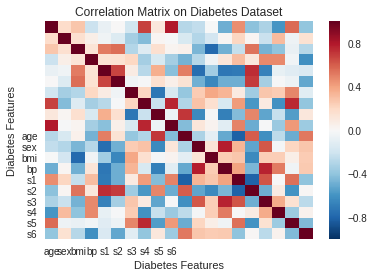

In [0]:
sns.heatmap(l, xticklabels=db_data.feature_names, yticklabels=db_data.feature_names)
plt.xlabel("Diabetes Features")
plt.ylabel("Diabetes Features")
plt.title("Correlation Matrix on Diabetes Dataset")